In [2]:
from TrER.plots import plot_cvar_group, plot_cvar_groups_with_markers
from TrER.plots import plot_cvar, plot_CVAR_TE
from TrER.gen_cvar import cvar_tau, cvar_plugin, cvar_mate, cvar_bbound_mate, cvar_bbounded, prep_bbounds_ate, job_condvar_gen, cvar_bbounds_ate

Rpackage, estimations database

In [1]:
import pandas as pd, numpy as np
job_binary = pd.read_csv("../data/results.csv")

ps = np.arange(0.01, 1.01, 0.01)
bs = np.arange(0, 0.30, 0.05)
rhos = [-1, -0.5, 0, 0.5, 0.9, 0.95, 1]

# CVAR

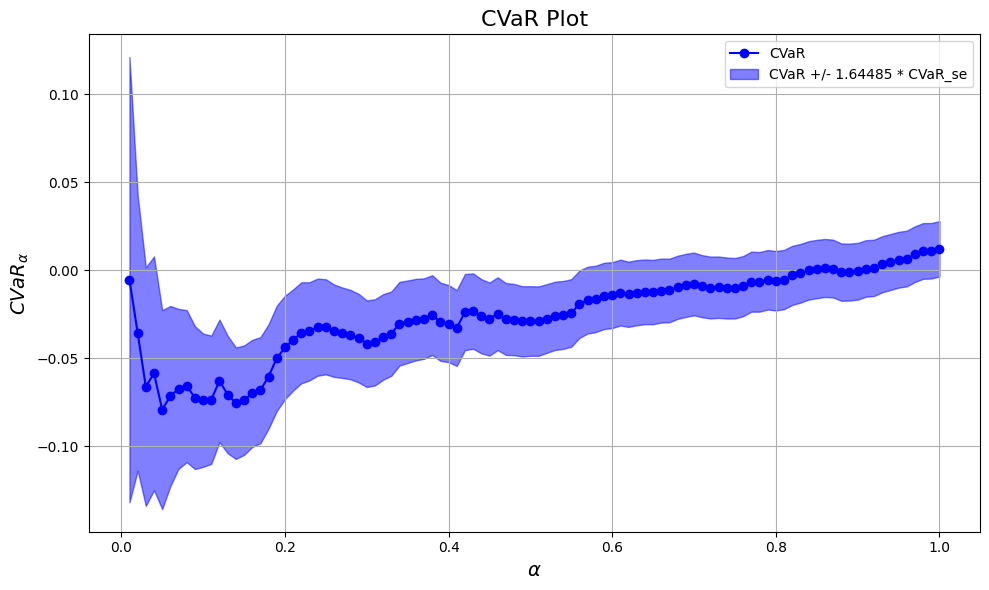

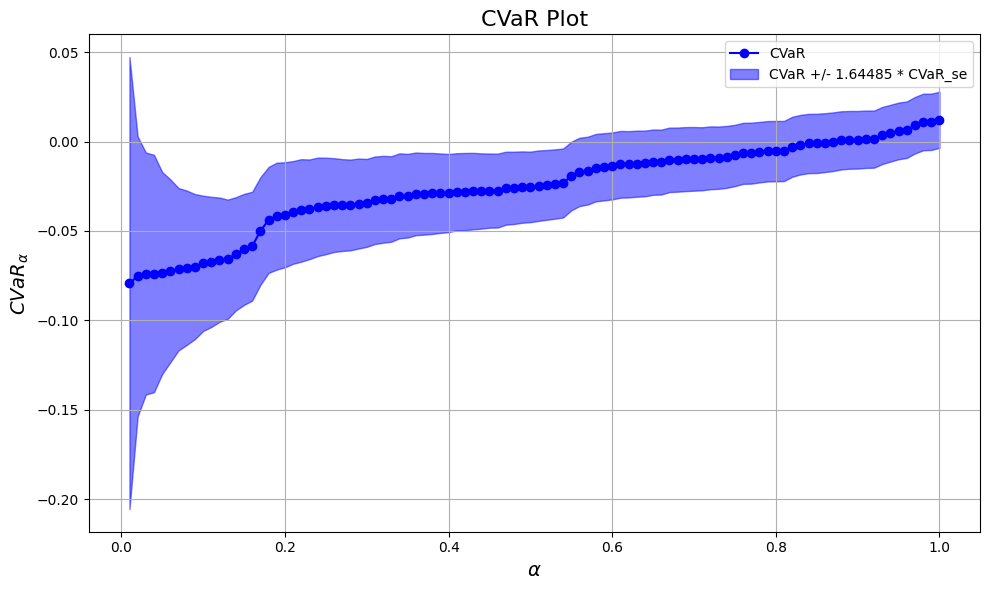

In [4]:
data = job_binary.copy()
CVaR = cvar_tau(data, ps)
plot_cvar(CVaR, rearrangement=False)
plot_cvar(CVaR, rearrangement=True)

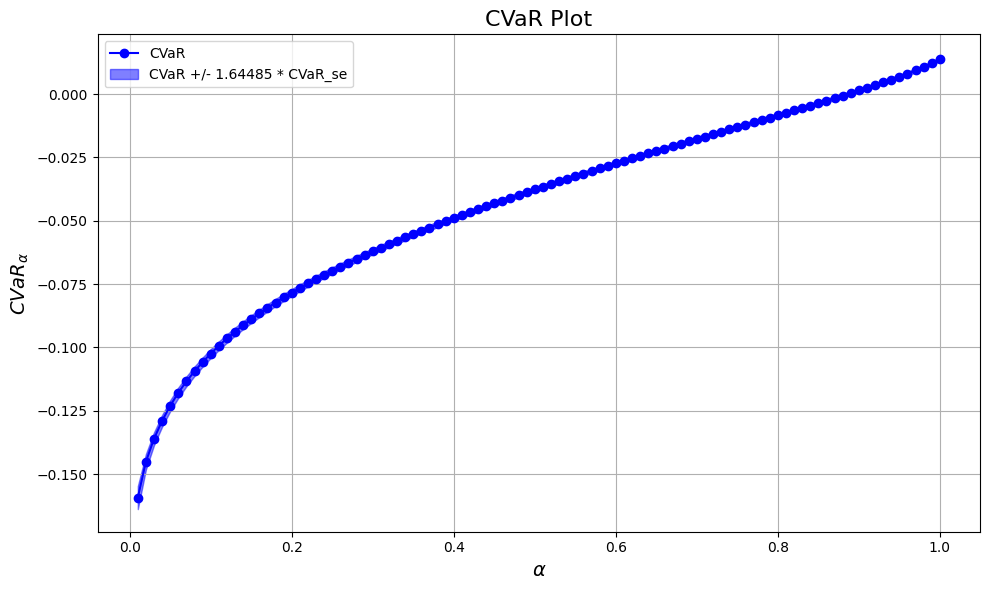

In [5]:

cvar_p = cvar_plugin(data, ps)

plot_cvar(cvar_p)

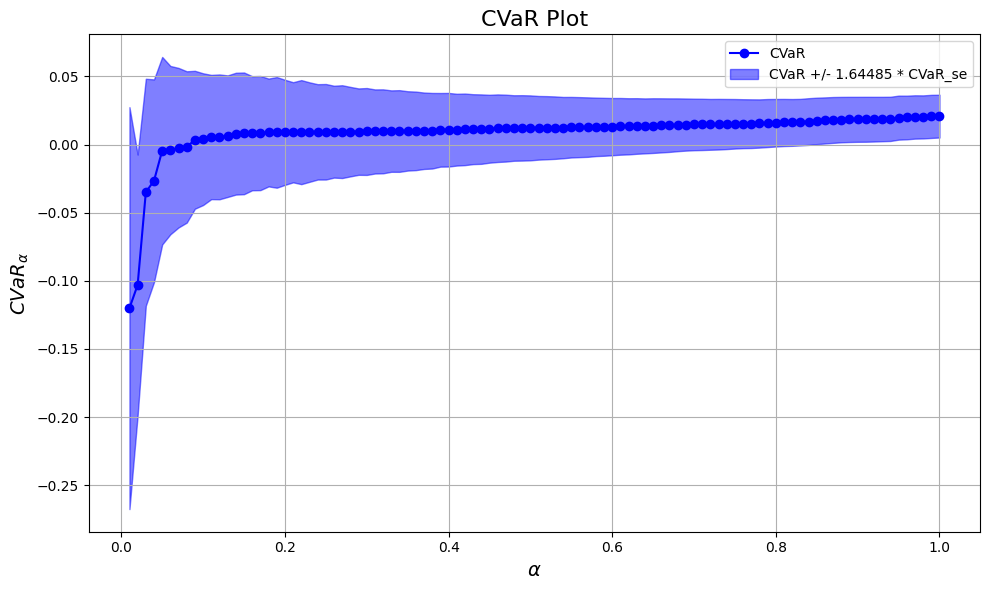

In [6]:
cvar_bad = cvar_tau(data, ps, tau_col='tau.bad')
plot_cvar(cvar_bad, rearrangement=True)

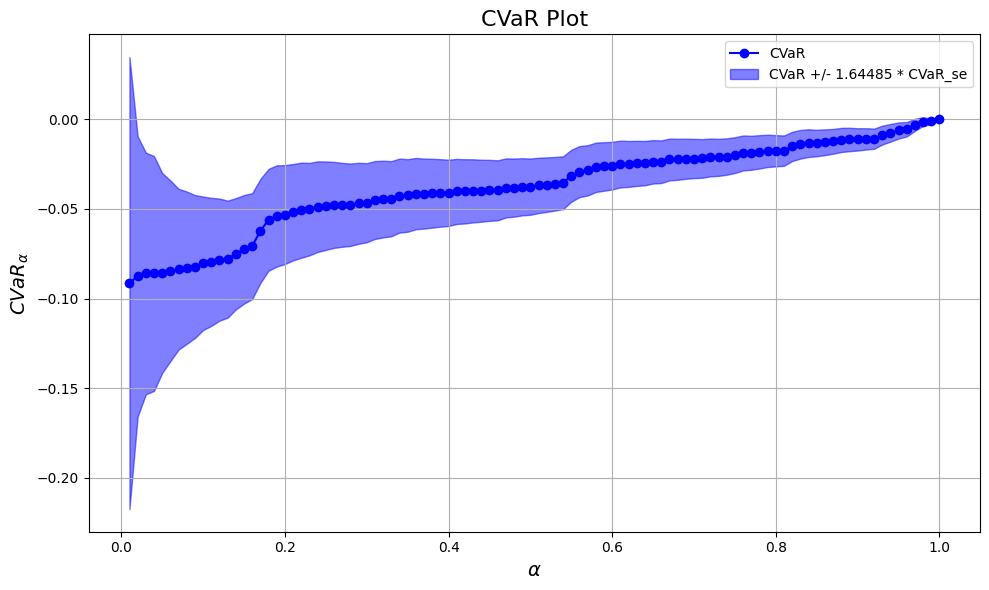

In [7]:
cvarmate = cvar_mate(data, ps)
plot_cvar (cvarmate , rearrangement= True)

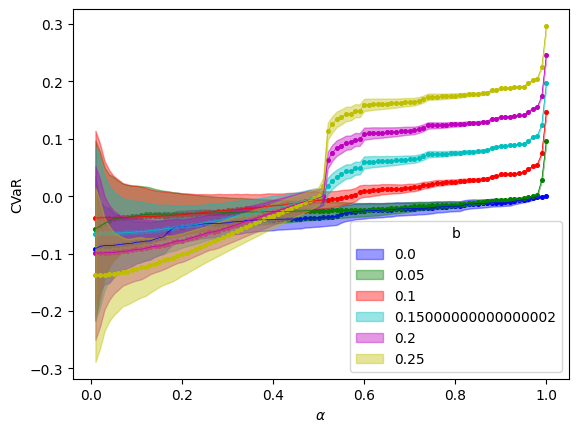

In [8]:
cvar_bbound_mate_df = cvar_bbound_mate(data, ps, bs)
plot_cvar_group(cvar_bbound_mate_df)

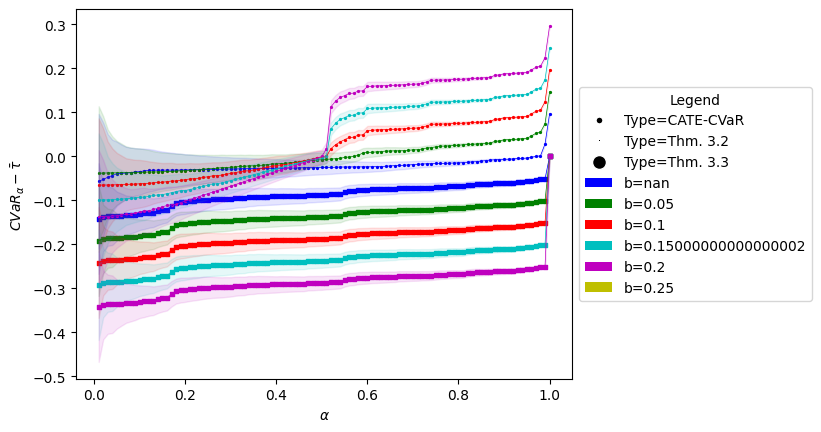

In [9]:

df_bounded = cvar_bbounded(cvarmate, cvar_bbound_mate_df, bs)
plot_cvar_groups_with_markers(
    df_bounded, "p", y = "CVaR"
)

In [ ]:

d, t, c1, c2 = prep_bbounds_ate(data)
sbound_mate = cvar_bbounds_ate (d, ps, rhos, t)


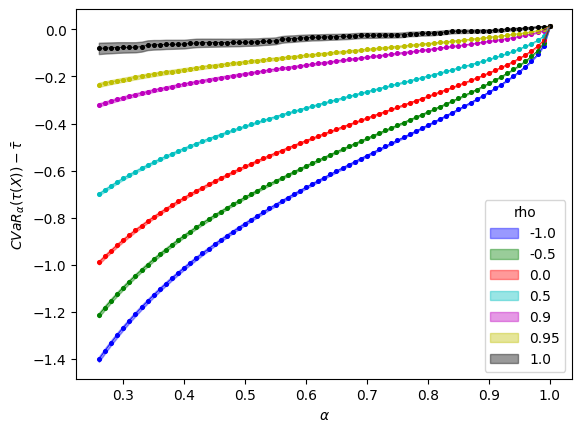

In [11]:
plot_cvar_group(
    sbound_mate.query("p>0.25"), group='rho', 
    y_label=r"${CVaR}_{\alpha}(\tau(X))-\bar\tau$"
)       


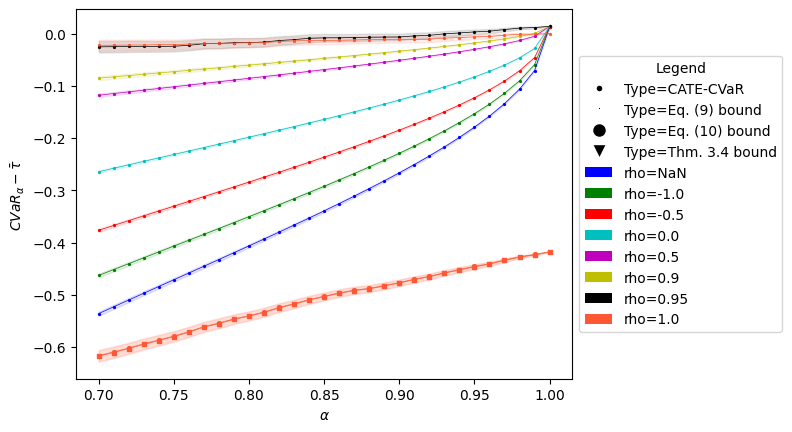

In [12]:
job_condvar = job_condvar_gen(cvarmate, sbound_mate, c1, c2)
plot_cvar_groups_with_markers(
    job_condvar,
    "p", "CVaR", main_group='rho', cvar_se="CVaR_se",
    y_label=r"${CVaR}_{\alpha}-\bar{\tau}$"
)

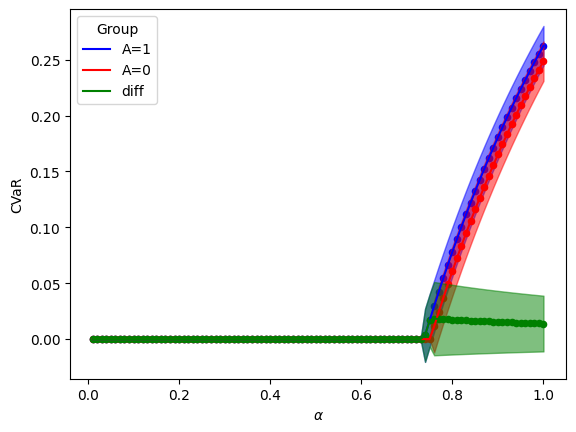

In [13]:
plot_CVAR_TE(data, ps)